# Cours 1 : premiers pas avec Python

## 1. Utilisation du notebook Python
---

Un notebook est constitué de 2 sortes de *cellules*:

* celles qui affichent du *texte formaté* 
* celles qui évaluent du *code Python*

Ceci est une cellule de texte qui peut être éditée en double-cliquant dessus.
On voit apparaître des *commandes* du langage [markdown](https://fr.wikipedia.org/wiki/Markdown).

Voici maintenant une cellule de code Python:

In [ ]:
5 + 3.2 / 10

: 

Le notebook permet d'écrire des programmes très lisibles, mais l'usage des outils de programmation est limité.

**Evaluation d'une cellule de code**

---

In [2]:
5 + 3.2 / 10

5.32

Pour évaluer cette *expression* numérique, taper sur les touches `SHIFT + ENTREE` du clavier après avoir cliqué sur la cellule. Apparaissent alors:
* un texte en sortie qui est la *valeur de l'expression*
* un numéro à côté de la cellule qui est son *ordre d'évaluation* qui peut être différent de son ordre d'apparition.

**Le notebook comme une calculatrice**

---
Dans le cours de Python, vos notes sont `8.5`, `12` et `9.5` de coefficients respectifs `1`, `2` et `3`. Avez-vous obtenu la moyenne?


In [3]:
(8.5*1+12*2+9.5*3)/5

12.2

**Quelques commentaires**

---

In [ ]:
(8.5 * 1 + 12 * 2 + 9.5 * 3) / (1 + 2 + 3) >= 10

* les nombres flottants s'écrivent avec un point et pas une virgule;
* les caractères `+`, `*`, `>=`, etc. s'appellent des *opérateurs*;
* les règles de priorité des expressions mathématiques s'appliquent et peuvent nécessiter l'usage des parenthèses;
* les espaces sont facultatifs, mais les règles de style recommandent (voir [PEP8](https://www.python.org/dev/peps/pep-0008/)):
    * un seul espace avant et après les opérateurs (+, /, etc...);
    * pas d'espace à l'intérieur des parenthèses;
    * si pas trop longue, l'expression est écrite sur une seule ligne

**Stocker un résultat**

---

L'instruction suivante sauve le résultat de l'expression `2 ** 10` dans la *variable* `a`.

In [ ]:
a = 2 ** 10

* pas de texte en sortie;
* car cette instruction est une *affectation* qui n'a pas de valeur (contrairement aux expressions);

**Afficher la valeur de la variable**

---
Deux possibilités:

In [ ]:
a

In [ ]:
print(a)

La première est spécifique du notebook. 

Il vaut mieux **privilégier la seconde**.

**Question**: au final, que calcule l'expression `2 ** 10`?

**Ordre d'évaluation du notebook: prudence**

---

Montrer que l'affichage dépend de l'ordre d'évaluation et pas de l'ordre d'apparition en évaluant les cellules plusieurs fois dans des ordres différents.

In [6]:
print(a)

False


In [4]:
a = False

In [5]:
print(a)

False


In [7]:
a = 0.1 ** 10

In [ ]:
print(a)

**Le notebook ne se limite pas à des calculs numériques**

---

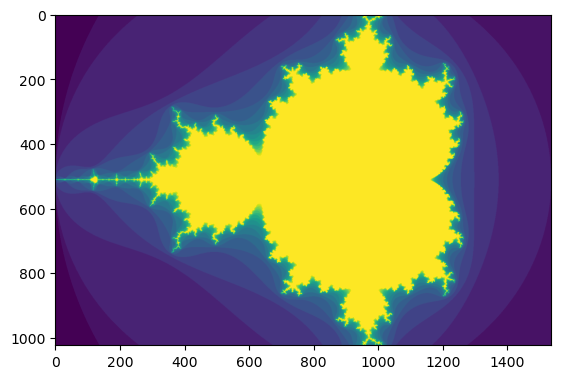

In [8]:
import numpy
from pylab import imshow, show

def mandel(x, y, max_iters):
  """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
  """
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return max_iters

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]
  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandel(real, imag, iters)
      image[y, x] = color

image = numpy.zeros((1024, 1536), dtype = numpy.uint8)
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 

imshow(image)
show()

## 2. Les variables
---
Un premier exemple:

In [ ]:
x = 2
y = x
print(x, y)
y = 3
print(x, y)

**Notes:** 
* `2` et `3` sont des *objets* de *type entier* (cf plus tard)
* `x` et `y` sont des identifiants qui font référence à l'un de ces objets
* règle de style: on met un espace après une virgule mais pas avant

**Echanger les valeurs de deux variables**

---


In [ ]:
x = 2
y = 3
#échanger la valeur des 2 variables ici

print(x, y)

In [ ]:
#Méthode fausse
x = 2
y = 3
x = y
y = x
print(x, y)

#première méthode
x = 2
y = 3
z = x
x = y
y = z
print(x, y)

#deuxième méthode plus pythonesque: utilisation de tuples
x = 2
y = 3
x, y = y, x
print(x, y)

**Question**: et permuter 3 variables circulairement?

In [9]:
x, y, z = 2, 3, 4
x, y, z = y, z, x
print(x, y, z)

3 4 2


**Remarque**: on a ajouté un commentaire avec le caractère `#` 

**Remarques sur l'affectation**

---
Contrairement à l'égalité en maths, l'opérateur d'affectation `=` n'est pas symétrique:

In [ ]:
5 = x

* l'opérande de gauche doit être une variable
* l'opérande de droite doit être une expression ($\approx$ avoir une valeur)

**Règles de nommage des variables**

---

* caractères autorisés:
    * caractère alphabétique (A à Z) en majuscule ou minuscule
    * chiffres (0 à 9)
    * caractère souligné `_` (touche 8 du clavier)
    * et c'est tout! Ni espace, ni caractères accentués...
* le nom ne doit pas commencer par un chiffre
* Python est sensible à la casse: les variables `toto` et `toTo` sont différentes
* ne pas utiliser un mot réservé du langage comme `print` et toutes les fonctions natives que nous verrons
* recommandations annexes:
    * sauf exceptions, donner un nom explicite aux variables tel `nb_de_vie`
    * suivre cet exemple, cad séparer les mots par des `_` sans majuscules
    * éviter d'autres formes telles `NbDeVie`; au moins être cohérent dans tout le programme


## 3. Types de données
---

Le type d'une donnée détermine:
* les opérations que l'on peut lui appliquer
* les valeurs qu'elle peut prendre

Les types prédéfinis que l'on va manipuler au début sont:
* les nombres entiers
* les nombres flottants
* les nombres booléens
* les chaînes de caractères

**Question**: donner des exemples d'opérations que l'on doit pouvoir faire avec ces types.

**Afficher les types**

---

In [ ]:
a = 5
print(type(a), type(7))

In [ ]:
a = 3.14
print(type(a))

In [ ]:
a = (5 < 2)
print(a, type(a))

In [ ]:
print(type("hello world"))

**Remarque**: le type d'une variable peut changer au cours du temps, et il n'est pas explicité par le programmeur (typage *dynamique* et *implicite*).

**Type entier**

---
Les entiers ont une précision arbitraire.

In [ ]:
a = 10 ** 10
print(a ** 10)

* division entière

In [ ]:
10 // 3

* division flottante

In [ ]:
10 / 3

* modulo

In [ ]:
10 % 3

**Questions**

---
Marcel met 17 minutes et 37 secondes pour venir à la fac. Combien de secondes cela fait-il au total?

In [10]:
res = 17 * 60 + 37
print(res)

1057


Il fait l'aller retour cinq fois par semaines. Combien d'heures, minutes et seconde passe-t'il à faire ce trajet dans la semaine?

In [ ]:
s_tot = 2 * 5 * res
h = s_tot // 3600
s_tot = s_tot % 3600
m = s_tot // 60
s = s_tot % 60
print(h, m, s)

**Opérateurs d'affectation augmentés**

---
Ajouter la valeur de `b` à la variable `a`:

In [ ]:
a, b = 2, 3
a += b
print(a)

Incrémenter (ajouter 1 à une) variable:

In [ ]:
a += 1
print(a)

Autres opérateurs: `-=`, `*=`, etc...

**Type flottant**

---
Pour la plupart des nombres à virgule, on manipule une *approximation* de leur valeur.

In [ ]:
3 * 0.1 == 0.3

La valeur exacte d'un flottant est donné par la fraction des 2 nombres suivants:

In [ ]:
(0.1).as_integer_ratio()

Les librairies `decimal` ou `fractions` permettent de faire du calcul exact.

**Utiliser des fonctions réelles standard**

---

In [ ]:
cos(3.14)

In [ ]:
import math
math.cos(math.pi)

La fonction cosinus n'est pas native de Python. Elle est dans le *module* `math`.

**Type booléen**

---
Utile pour les *instructions de contrôle* d'un programme.
* Deux valeurs: `False` et `True`.
* Opérateurs de l'algèbre de Boole: `and`, `or`, `not`
* Opérateurs de comparaison:
    * `>=` supérieur ou égal
    * `==` test d'égalité
    * `!=` test de non égalité
   
**Question**: tester si une variable est plus petite ou égale à 0 ou bien comprise entre 1 et 3 sans être entière. 


In [ ]:
a = -0.5
res = (a <= 0) or (a > 1 and a < 3 and a != 2)
print(res)

**Chaînes de caractères (string)**

---
Suite de caractères entre guillemets (simple ou double).

In [ ]:
s1 = "hello"
s2 = 'world'
print(s1, s2)

Des opérations sur les chaînes de caractères sont fournies nativement:

In [ ]:
print(s1 + s2)
print(len(s1))
print(s1 > s2)
print(s1 in s2)
print(s1.upper())

**Question**: quelle est la signification de ces opérations?

**Connaître plus de fonctions de manipulations des chaînes de caractères**

---

* documentation officielle Python3: [https://docs.python.org/fr/3/library/stdtypes.html#text-sequence-type-str](https://docs.python.org/fr/3/library/stdtypes.html#text-sequence-type-str)
* faire une recherche sur internet (par exemple sur [stackoverflow](https://stackoverflow.com/)) pour un usage précis
* directement dans l'interpréteur:

In [ ]:
help(str)

Cela fonctionne avec n'importe quel type d'objet:

In [ ]:
help(float)

**Des affichages plus sympas**

---

In [ ]:
x, y = 2, 3.5
print("x vaut", x, "et y vaut", y)

**Remarque**: la fonction `print` ajoute un espace entre l'affichage de chacun de ses *arguments* et un *retour à la ligne* à la fin.

Arguments $=$ expressions séparées par des virgules entre les parenthèses. 

**Concaténation**

---
L'opérateur `+` fait la *concaténation* de deux chaînes de caractères.

Attention à ne pas mélanger les types:

In [ ]:
"hello" + 3

**Concaténation**

---

Ce qui suit est légal. Devinez le sens de cette expression:

In [ ]:
print("hello" * 3)

Comment faire pour afficher 3 fois `hello` en revenant à la ligne à chaque fois?

In [ ]:
print("hello\n"*3)

On utilise le retour à la ligne `\n`.

**Conversion de types**

---
* Le mélange de flottants et d'entiers dans une expression numérique donne une valeur flottante

In [ ]:
print(type(5 + 2.0))
print(type(7 * 1.0))

* Fonctions de conversion (utilisable quand cela a un sens):
    * `int`: conversion en entier
    * `float`: conversion en flottant
    * `str`: conversion en chaîne de caractères

In [ ]:
x, y = 2, 3.5
s = "x vaut " + str(x) + " et y vaut " + str(y)
print(s)

**Récupérer une valeur tapée au clavier par un utilisateur**

---

In [ ]:
s = input("Entrer un texte\n")
print(s)

In [ ]:
s = input("entrer un nombre entier\n")
print("le nombre qui le précède est", s - 1)

In [ ]:
s = input("entrer un nombre entier\n")
print("le nombre qui le précède est", int(s) - 1)

**Questions**

---
* deviner ce que pourrait valoir les expressions `-1 % 5`, `int(3.14)`, `int(-3.14)`
* demander un nombre entier à l'utilisateur, puis écrire une expression qui retourne `True` si le nombre est pair, et `False` sinon;
* écrire une expression qui permet de récupérer le nombre de chiffres de la représentation décimale d'un entier, par exemple de `3 ** 57`;
* afficher ensuite le chiffre le plus à gauche de ce nombre.

In [ ]:
print(3 ** 57, "le nombre de chiffres est", len(str(3 ** 57)))
s = input("Entrer un nombre entier\n")
print(int(s) % 2 == 0)
#pour afficher le chiffre, il faut se débrouiller avec ce qu'on connait...
long = len(s)
print(int(s) // 10 ** (long - 1))
#la bonne solution (qu'on verra plus tard avec les listes)
print(s[0])